In [1]:
import numpy as np
from dscribe.descriptors import MBTR

In [2]:
# Setup
mbtr = MBTR(
    species=["H", "O"],
    k1={
        "geometry": {"function": "atomic_number"},
        "grid": {"min": 0, "max": 10, "n": 200, "sigma": 0.1},
    },
    k2={
        "geometry": {"function": "inverse_distance"},
        "grid": {"min": 0, "max": 1.5, "n": 200, "sigma": 0.1},
        "weighting": {"function": "exp", "scale": 0.5, "threshold": 1e-3},
    },
    k3={
        "geometry": {"function": "cosine"},
        "grid": {"min": -1, "max": 1, "n": 200, "sigma": 0.1},
        "weighting": {"function": "exp", "scale": 0.5, "threshold": 1e-3},
    },
    periodic=False,
    normalization="none",
    flatten=False
)


{0: 1, 1: 8}
{0: 'H', 1: 'O'}


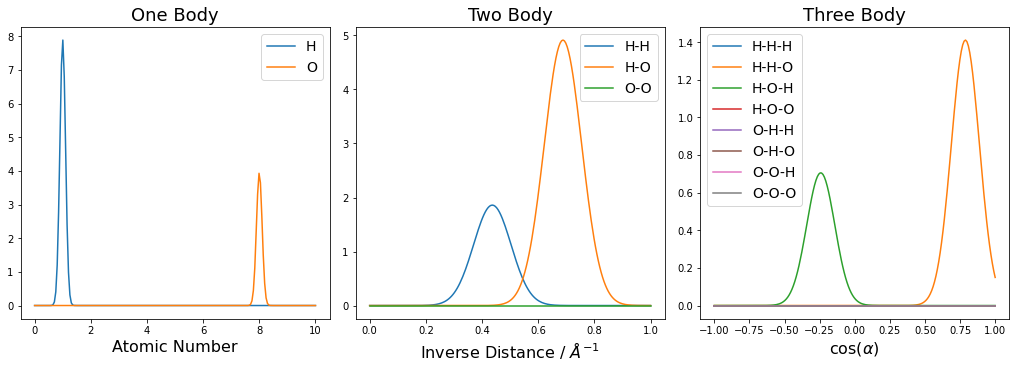

In [9]:
from ase.build import molecule
import ase.data
from ase.build import bulk
import matplotlib.pyplot as plt

water = molecule("H2O")

# Create MBTR output for the system
mbtr_output = mbtr.create(water)
#print(mbtr_output["k3"])

# Create the mapping between an index in the output and the corresponding
# chemical symbol
n_elements = len(mbtr.species)
imap = mbtr.index_to_atomic_number
print(imap)
x = np.linspace(0, 10, 200)
smap = {index: ase.data.chemical_symbols[number] for index, number in imap.items()}
print(smap)

fig = plt.figure(constrained_layout=True,frameon=False,figsize=(14,5))

ax_dict = fig.subplot_mosaic(
    [["k1","k2","k3"]],
)

# Plot k=1
#fig, ax = plt.subplots()
for i in range(n_elements):
        ax_dict["k1"].plot(x, mbtr_output["k1"][i, :], label="{}".format(smap[i]))
        ax_dict["k1"].legend(fontsize=14)
ax_dict["k1"].set_xlabel("Atomic Number",fontsize=16)
ax_dict["k1"].set_title("One Body",fontsize=18)
#ax_dict["k1"].set_aspect('equal')#plt.show()

x = np.linspace(0, 1, 200)
# Plot k=2
for i in range(n_elements):
    for j in range(n_elements):
        if j >= i:
            ax_dict["k2"].plot(x, mbtr_output["k2"][i, j, :], label="{}-{}".format(smap[i], smap[j]))
            ax_dict["k2"].legend(fontsize=14)
ax_dict["k2"].set_xlabel(r"Inverse Distance / $\AA^{-1}$",fontsize=16)
ax_dict["k2"].set_title("Two Body",fontsize=18)
#ax_dict["k2"].set_aspect('equal')#plt.show()

x = np.linspace(-1, 1, 200)
#fig, ax = plt.subplots()
for i in range(n_elements):
    for j in range(n_elements):
        for k in range(n_elements):
            ax_dict["k3"].plot(x, mbtr_output["k3"][i, j, k, :], label="{}-{}-{}".format(smap[i], smap[j], smap[k]))
            ax_dict["k3"].legend(fontsize=14)

ax_dict["k3"].set_xlabel(r"$\cos(\alpha)$",fontsize=16)
ax_dict["k3"].set_title("Three Body",fontsize=18)
#ax_dict["k3"].set_aspect('equal')#plt.show()

plt.savefig('MBTR_water.png',bbox_inches='tight')

plt.show()


In [7]:
from ase.visualize import view
view(water, viewer='ngl')